In [ ]:
from load_data import generate_pair_sets
from Visualization import plot_pairs

In [ ]:
train_data, train_target, train_classes, test_data, test_target, test_classes = generate_pair_sets(10)

In [ ]:
print(
    train_data.shape,
    train_classes.shape,
    train_target.shape
)
print(
    test_data.shape,
    test_classes.shape,
    test_target.shape
)

torch.Size([10, 2, 14, 14]) torch.Size([10, 2]) torch.Size([10])
torch.Size([10, 2, 14, 14]) torch.Size([10, 2]) torch.Size([10])


larger is 0; smaller or equal is 1

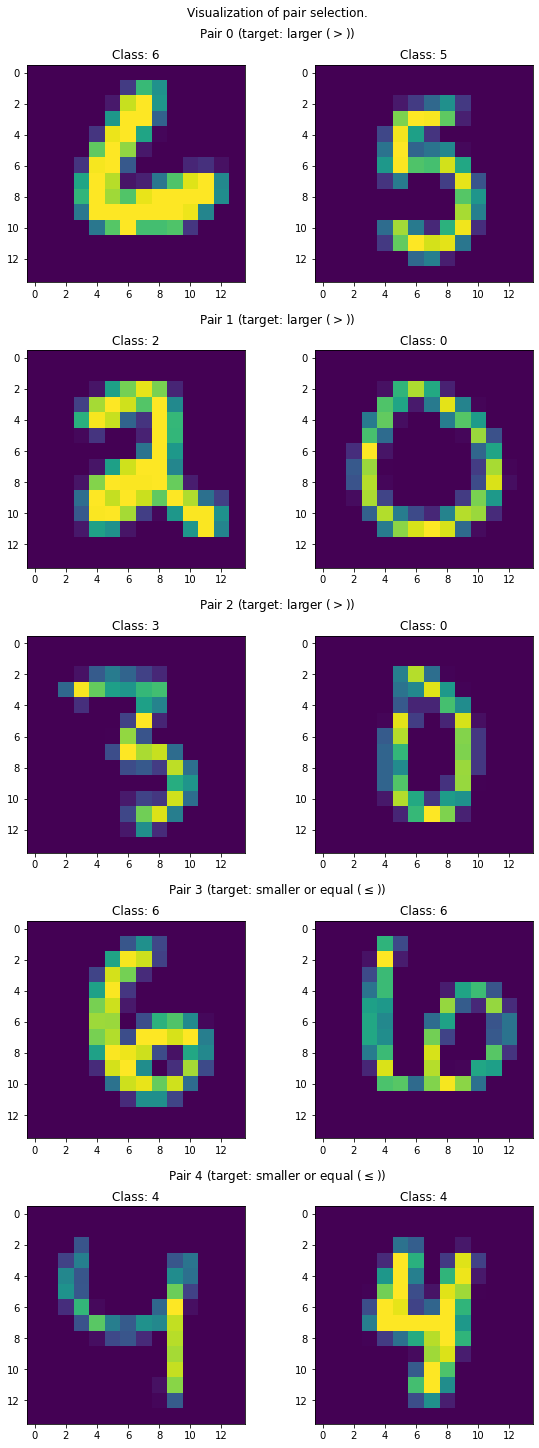

In [ ]:
plot_pairs(5, train_data, train_classes, train_target)